# Mall Customer Segmentation
*Regresión logística*

## OBJETIVO ##
- Aplicar algoritmos de Machine
Learning no supervisado según el problema, empleando técnicas
de Clustering

## DATOS ##
Los datos son obtenidos de https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python  

##  DESARROLLO
A continuación se realizará las actividades propuestas para la entrega de la Tarea

### 1. Exploración y Perfilamiento de datos

**Cargue de librerias y datos**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
!pip install kneed
from kneed import KneeLocator

**Lectura de datos**

In [3]:
data_raw = pd.read_csv('/content/Mall_Customers.csv') # Ruta de acceso a los datos
data_raw.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Dimensiones e información del DataFrame**

In [4]:
#Dimensión del DataFrame
data_raw.shape

(200, 5)

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data_raw.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


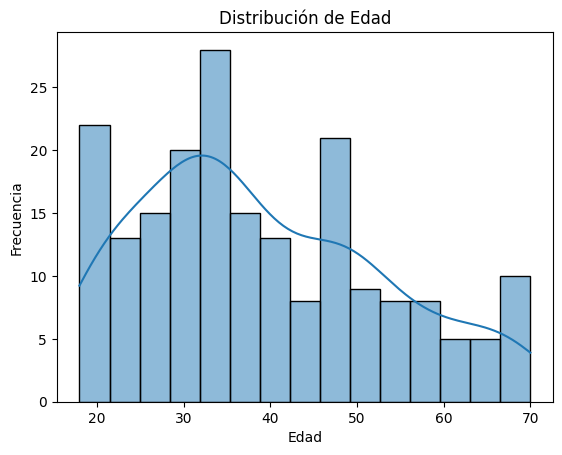

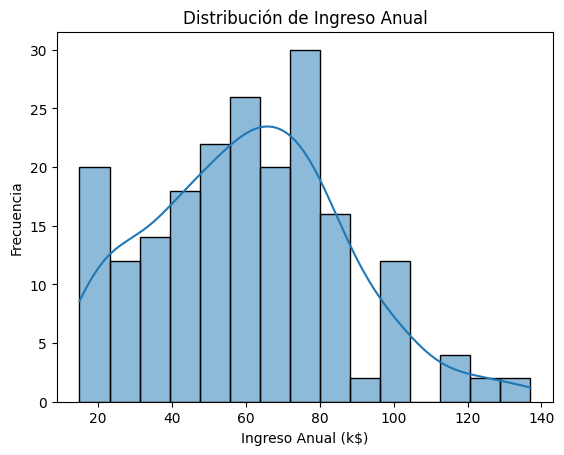

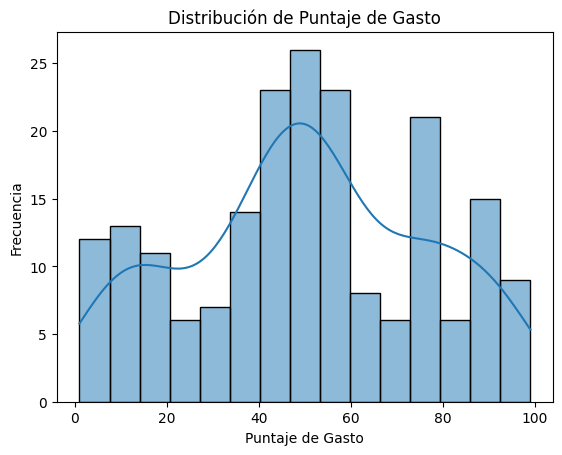

In [7]:
# Histograma de la edad
sns.histplot(data_raw['Age'], bins=15, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del ingreso anual
sns.histplot(data_raw['Annual Income (k$)'], bins=15, kde=True)
plt.title('Distribución de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del puntaje de gasto
sns.histplot(data_raw['Spending Score (1-100)'], bins=15, kde=True)
plt.title('Distribución de Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto')
plt.ylabel('Frecuencia')
plt.show()


**Datos ausentes y duplicados** Para el perfilamiento de datos se examina la calidad de los datos por medio de los valores faltantes y duplicados

In [8]:
data_raw.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
data_raw.duplicated().sum()

np.int64(0)

Explorando la relación entre variables

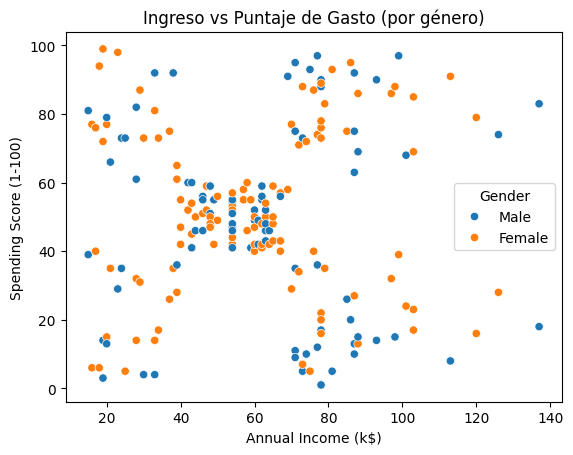

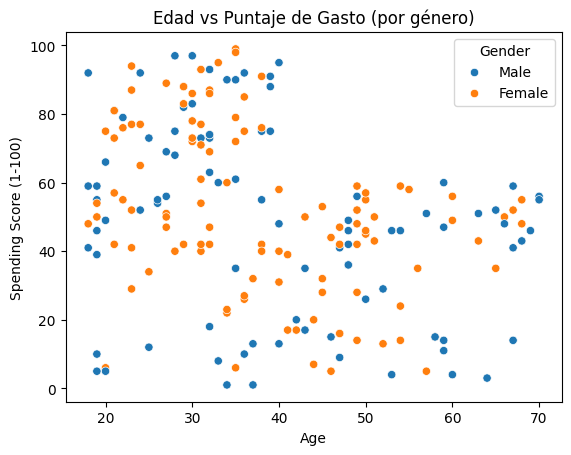

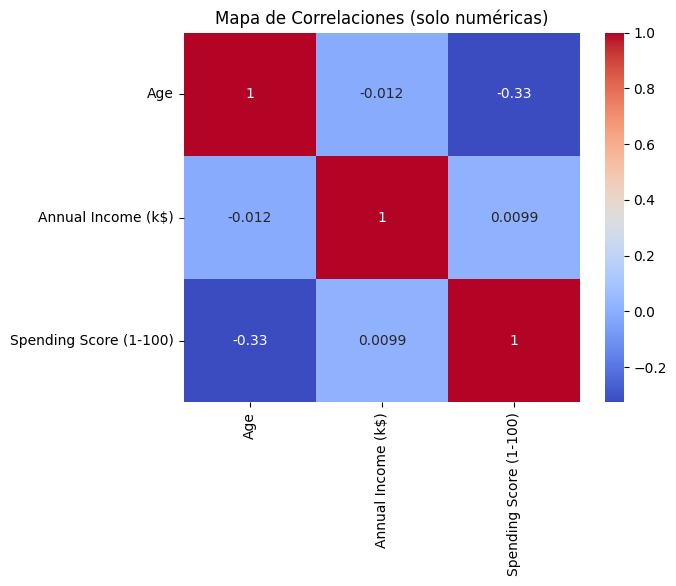

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [10]:
# Relación entre ingreso y puntaje de gasto
sns.scatterplot(data=data_raw, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Ingreso vs Puntaje de Gasto (por género)')
plt.show()

# Relación entre edad y puntaje de gasto
sns.scatterplot(data=data_raw, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Edad vs Puntaje de Gasto (por género)')
plt.show()

# Mapa de calor
corr = data_raw.drop(['CustomerID', 'Gender'], axis=1).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlaciones (solo numéricas)')
plt.show()
print (corr)



**Comparar gasto e ingreso por género**

<ipython-input-11-3ea4176e31e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_raw, x='Gender', y='Annual Income (k$)', palette='Set2',legend=False)


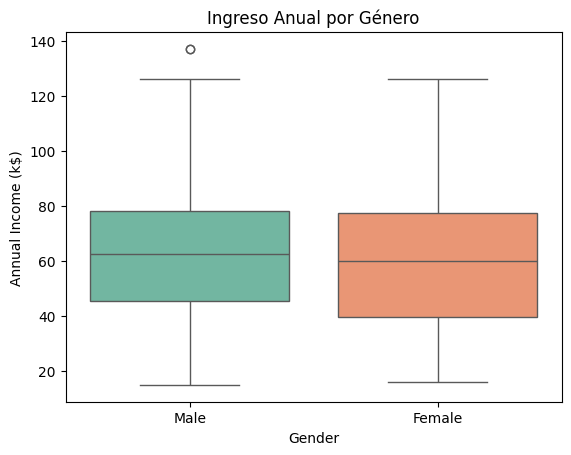

<ipython-input-11-3ea4176e31e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_raw, x='Gender', y='Spending Score (1-100)', palette='Set3',legend=False)


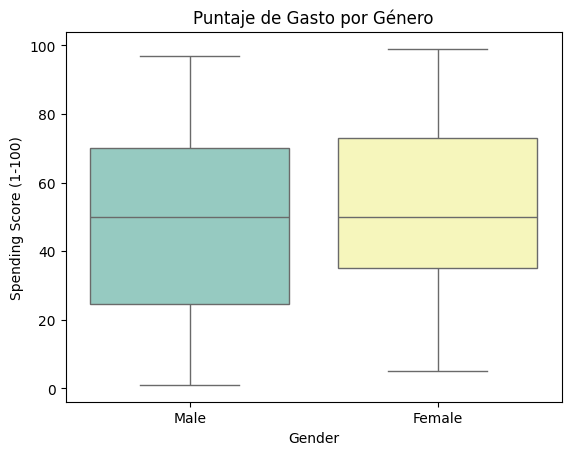

In [11]:
# Ingreso anual por género
sns.boxplot(data=data_raw, x='Gender', y='Annual Income (k$)', palette='Set2',legend=False)
plt.title('Ingreso Anual por Género')
plt.show()

# Puntaje de gasto por género
sns.boxplot(data=data_raw, x='Gender', y='Spending Score (1-100)', palette='Set3',legend=False)
plt.title('Puntaje de Gasto por Género')
plt.show()

Se puede observar que no hay relaciones lineales fuertes, lo que es ideal para aplicar algoritmos de clustering no supervisado.

Las personas no se agrupan por ingreso o edad de manera obvia, por lo que segmentar con K-means o clustering jerárquico puede revelar grupos ocultos en el comportamiento de los clientes.

El Spending Score es clave para el clustering, ya que muestra variabilidad clara frente a otras variables.

**Posibles valores atípicos**

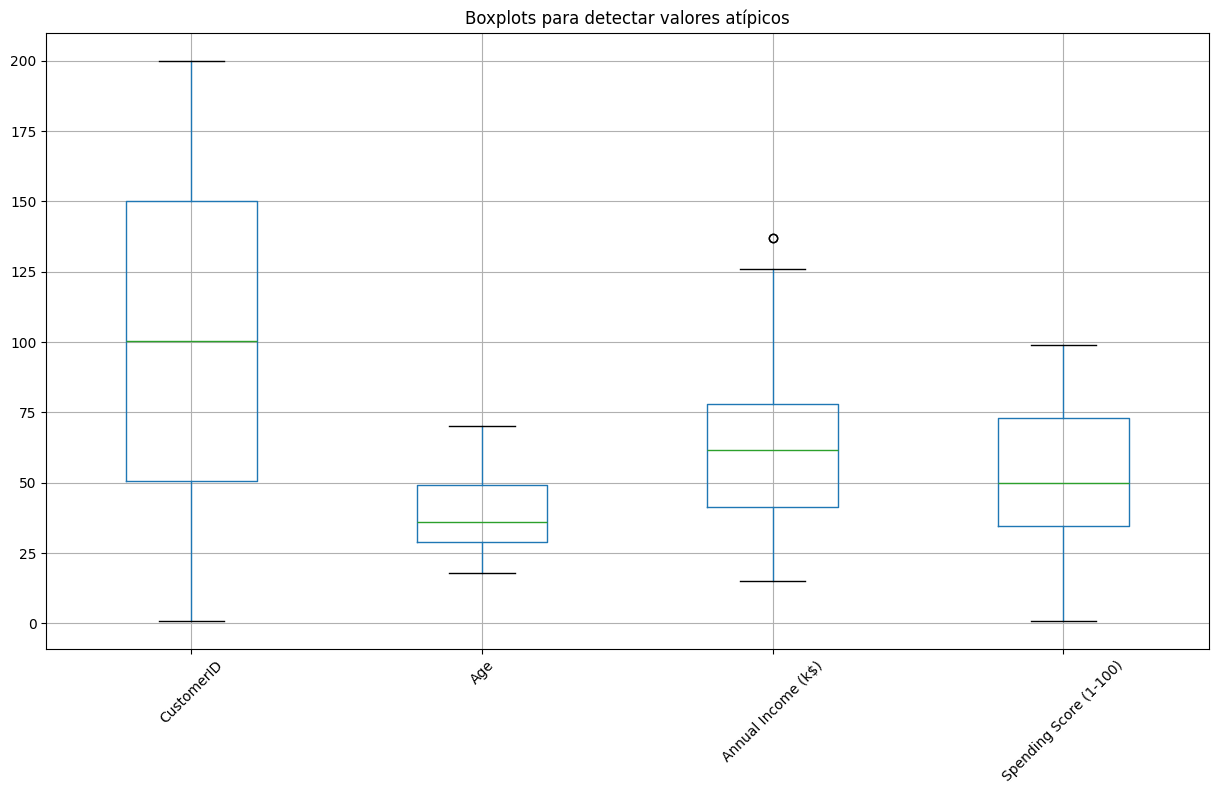

In [12]:
data_raw.boxplot(figsize=(15,8), rot=45)
plt.title("Boxplots para detectar valores atípicos")
plt.show()


La exploración inicial del dataset muestra que la cantidad de hombres y mujeres en el conjunto de datos está relativamente balanceada, con una ligera predominancia de un género (según el gráfico de barras).

Esto indica que el género podría ser una variable relevante, pero no dominante, para segmentar clientes.El ingreso anual está bastante distribuido entre 15k y 137k dólares.

No se observa una correlación clara entre el ingreso y el puntaje de gasto (correlación ≈ 0.01), lo que indica que mayores ingresos no implican mayor gasto necesariamente.

La mayoría de los clientes se encuentran en un rango de edad entre 20 y 50 años.

Existe una correlación negativa moderada entre edad y gasto (-0.33), lo que sugiere que los clientes más jóvenes tienden a gastar más en promedio.

Presenta una distribución amplia, con algunos clientes con valores muy bajos y otros con valores muy altos.

Es una variable clave para segmentar clientes, ya que muestra mucha variabilidad y diferencia de comportamiento.

Baja correlación entre las variables numéricas, lo cual es positivo para aplicar clustering: se espera que los grupos descubiertos por los algoritmos no sean triviales o evidentes.

Algunos grupos visuales ya parecen formarse, especialmente en el gráfico de Annual Income vs. Spending Score. Esto indica que es probable que el clustering encuentre segmentos bien definidos.

## 2. Preparación de los datos

Teniendo en cuenta que no existe ni valores nulos ni valores repetidos se realizará lo siguiente de acuerdo a la observación inicial de los datos y a la documentación de la data para el preprocesamiento de datos se realizará :
- Eliminar columnas no útiles: CustomerID no aporta información relevante para el clustering:

- Codificación de variables categóricas: K-means y clustering jerárquico funcionan mejor con variables numéricas compactas

-  Normalización / Escalado



In [13]:
data = data_raw.copy()

In [14]:
#Eliminar columnas no útiles
df=data.drop('CustomerID', axis=1)

**Codificación**

In [15]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(data['Gender'])  # Male = 1, Female = 0 (por defecto)


**Normalización**

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
df_final = pd.DataFrame(df_scaled, columns=df.columns)
# Verificando  que no esté 'CustomerID'
print(df_final.columns)
df_final.head()

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


## 3. Selección de característica
De acuerdo a la exploración inicial se puedo observar que las correlaciones eran correlaciones eran:


Age   :                 -0.33 con Spending Score  
Annual Income (k$)   :    0.01 con Spending Score  
Gender        :            se debe analizar por separado
Esto  indica que:

Spending Score y Age tienen cierta relación negativa.

Annual Income tiene muy poca correlación con otros, pero es importante.

Gender puede influir, pero podría no ser esencial para el agrupamiento si se desea una segmentación puramente socioeconómica/comportamental.

En este caso se va a analizar todas las variables

## 4. Entrenar el modelo con ajuste de hiperparámetros.

 K-Means Clustering:El hiperparámetro más importante de K-Means es k = número de clústeres.


Clustering Jerárquico:En este modelo no se define k directamente al principio, pero se puede visualizar los clústeres con un dendrograma y luego decidir cuántos cortar

**Kmeans**

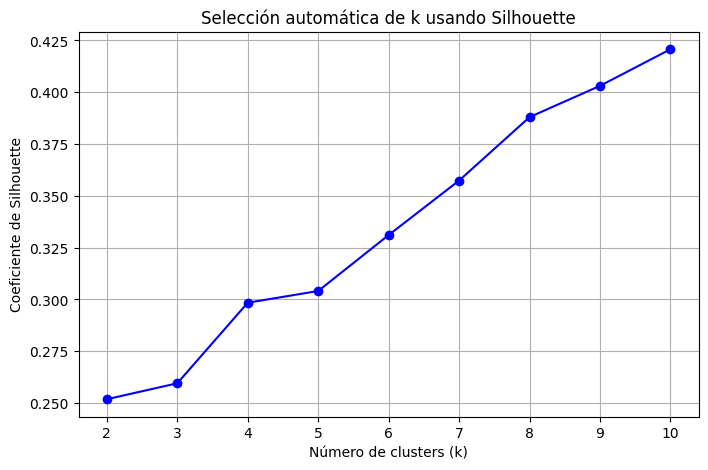

El mejor número de clusters según Silhouette es: 10


In [18]:
X = df_final.copy()
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Selección automática de k usando Silhouette')
plt.grid(True)
plt.show()

# Mejor k
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"El mejor número de clusters según Silhouette es: {best_k}")

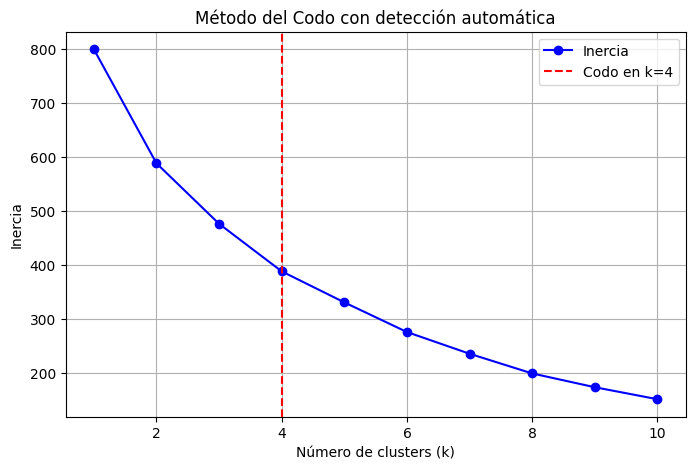

El mejor número de clusters según el método del codo es: 4


In [19]:


inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Encontrar el "codo"
kneedle = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
best_k_elbow = kneedle.knee

# Gráfica con el codo marcado
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', label='Inercia')
plt.axvline(x=best_k_elbow, color='red', linestyle='--', label=f'Codo en k={best_k_elbow}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con detección automática')
plt.legend()
plt.grid(True)
plt.show()

print(f"El mejor número de clusters según el método del codo es: {best_k_elbow}")


Método del codo:k=	4	Punto donde agregar más clusters ya no reduce significativamente la inercia (compactación).
Silhouette: k= 10	Calidad del agrupamiento (separación entre clusters + cohesión interna).

**Pipeline** Anteriormente se observó el numero de clusters de acuerdo a los métodos esto da una idea del rango en el cual se va a tomar el mejor k, para realizar el entrenamiento de los modelos se realizará un pipeline para cada uno.

In [20]:


def kmeans_pipeline(X, k_range=range(2, 11)):
    results = []

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X)

        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)

        results.append({
            'k': k,
            'silhouette': silhouette,
            'calinski': calinski,
            'model': model,
            'labels': labels
        })

    # Convertir a DataFrame
    scores_df = pd.DataFrame(results).drop(columns='model')

    # Visualizar métricas
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.lineplot(data=scores_df, x='k', y='silhouette', ax=ax[0])
    ax[0].set_title('Silhouette Score por k')
    sns.lineplot(data=scores_df, x='k', y='calinski', ax=ax[1])
    ax[1].set_title('Calinski-Harabasz Score por k')
    plt.show()

    # Seleccionar el mejor modelo por Silhouette
    best_model = max(results, key=lambda x: x['silhouette'])
    print(f"Mejor k (Silhouette): {best_model['k']:.0f}")

    # Visualizar clusters
    X_vis = X.copy()
    X_vis['Cluster'] = best_model['labels']
    sns.scatterplot(data=X_vis, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
    plt.title(f'KMeans con k={best_model["k"]}')
    plt.show()

    return best_model['model'], best_model['labels'], scores_df


In [21]:
def hierarchical_pipeline(X, k_range=range(2, 11), linkage='ward'):
    results = []

    for k in k_range:
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(X)

        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)

        results.append({
            'k': k,
            'silhouette': silhouette,
            'calinski': calinski,
            'model': model,
            'labels': labels
        })

    # Convertir resultados a DataFrame
    scores_df = pd.DataFrame(results).drop(columns='model')

    # Visualización de métricas
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.lineplot(data=scores_df, x='k', y='silhouette', ax=ax[0])
    ax[0].set_title('Silhouette Score por k (Hierarchical)')
    sns.lineplot(data=scores_df, x='k', y='calinski', ax=ax[1])
    ax[1].set_title('Calinski-Harabasz Score por k (Hierarchical)')
    plt.show()

    # Mejor k por Silhouette
    best_model = max(results, key=lambda x: x['silhouette'])
    print(f"Mejor k (Silhouette - Hierarchical): {best_model['k']:.0f}")

    # Visualización de clusters
    X_vis = X.copy()
    X_vis['Cluster'] = best_model['labels']
    sns.scatterplot(data=X_vis, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
    plt.title(f'Hierarchical Clustering con k={best_model["k"]} (linkage={linkage})')
    plt.show()

    return best_model['model'], best_model['labels'], scores_df

## 5  Evaluación del modelo
Se va medir el rendimiento del modelo con la métrica de Silhouette

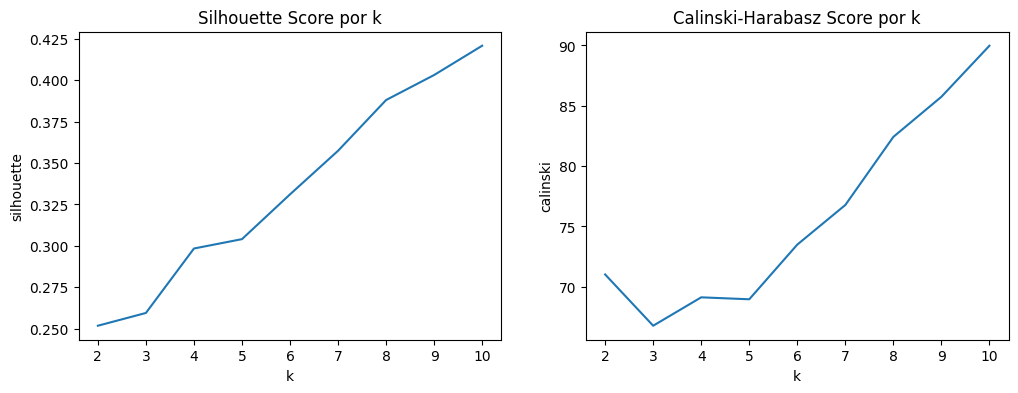

Mejor k (Silhouette): 10


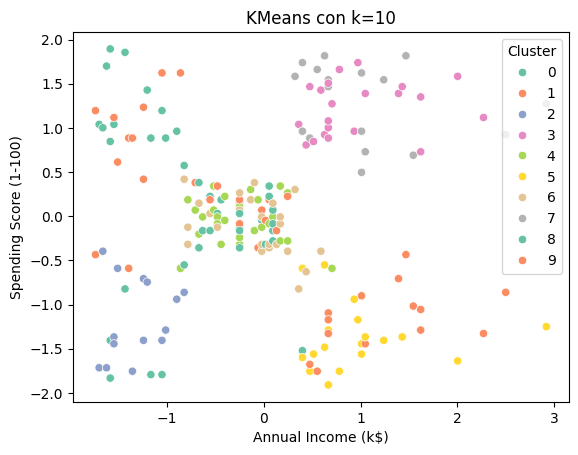

K-Means Evaluation:
- Silhouette Score: 0.4208
- Calinski-Harabasz Index: 89.98


In [22]:
# Ajustar el pipeline y predecir

best_kmeans_model, kmeans_labels, _ = kmeans_pipeline(df_final.copy())

kmeans_labels = best_kmeans_model.labels_ # Get labels directly from the trained KMeans model

# Métricas
print("K-Means Evaluation:")
print(f"- Silhouette Score: {silhouette_score(df_final.copy(), kmeans_labels):.4f}") # Corrected the function call to silhouette_score
print(f"- Calinski-Harabasz Index: {calinski_harabasz_score(df_final.copy(), kmeans_labels):.2f}")

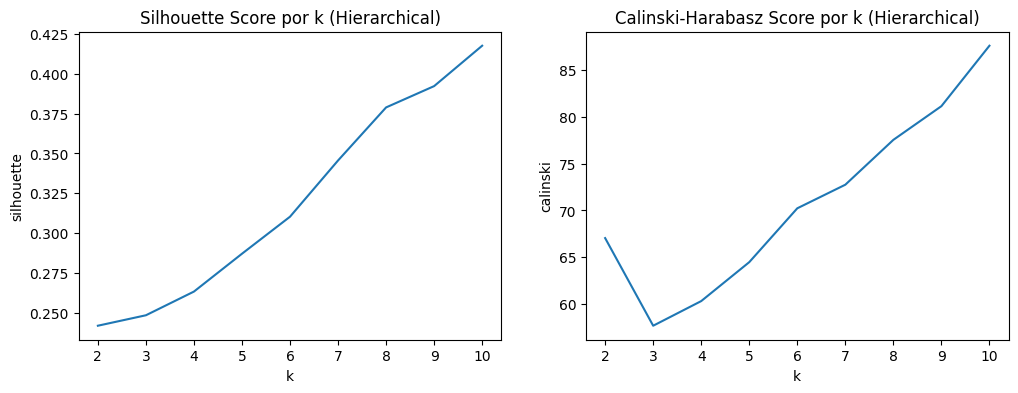

Mejor k (Silhouette - Hierarchical): 10


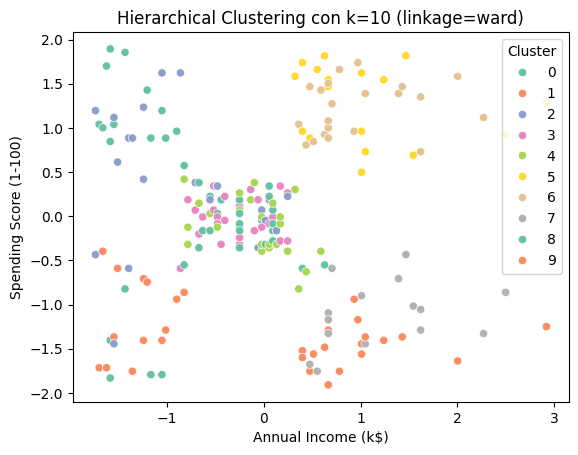

Hierarchical Clustering Evaluation:
- Silhouette Score: 0.4176
- Calinski-Harabasz Index: 87.61


In [23]:
# Ajustar el pipeline y predecir
best_hierarchical_model, hierarchical_labels, _ = hierarchical_pipeline(df_final.copy())  # Assuming df_final contains your features


hierarchical_labels = best_hierarchical_model.labels_

# Métricas
print("Hierarchical Clustering Evaluation:")
print(f"- Silhouette Score: {silhouette_score(df_final.copy(), hierarchical_labels):.4f}")  # Use df_final here
print(f"- Calinski-Harabasz Index: {calinski_harabasz_score(df_final.copy(), hierarchical_labels):.2f}")  # Use df_final here

In [24]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.8331


## 6. Visualización de los resultados



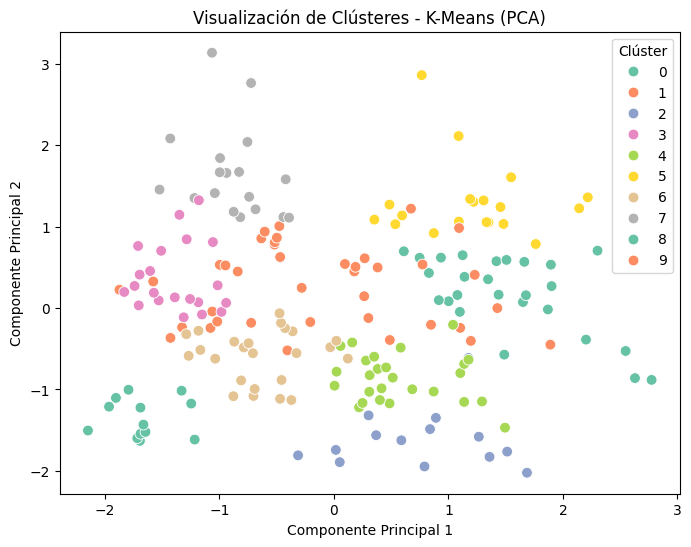

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducción a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualización para K-Means
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set2', s=60)
plt.title('Visualización de Clústeres - K-Means (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

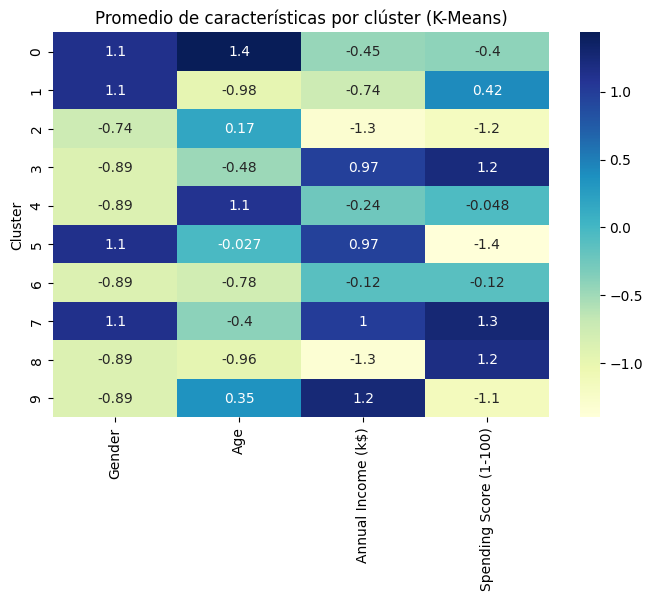

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,1.128152,1.435058,-0.452983,-0.401952
1,1.128152,-0.976027,-0.737052,0.416038
2,-0.742508,0.169677,-1.316409,-1.166865
3,-0.886405,-0.477932,0.972848,1.221585
4,-0.886405,1.098306,-0.241583,-0.048079
5,1.128152,-0.027007,0.967012,-1.397168
6,-0.886405,-0.781539,-0.122142,-0.119570
7,1.128152,-0.399900,1.013441,1.260407
8,-0.886405,-0.960846,-1.330880,1.177786


In [33]:

clustered_data = X.copy()
clustered_data['Cluster'] = kmeans_labels
mean_values = clustered_data.groupby('Cluster').mean()

plt.figure(figsize=(8,5))
sns.heatmap(mean_values, annot=True, cmap='YlGnBu')
plt.title("Promedio de características por clúster (K-Means)")
plt.show()
mean_values

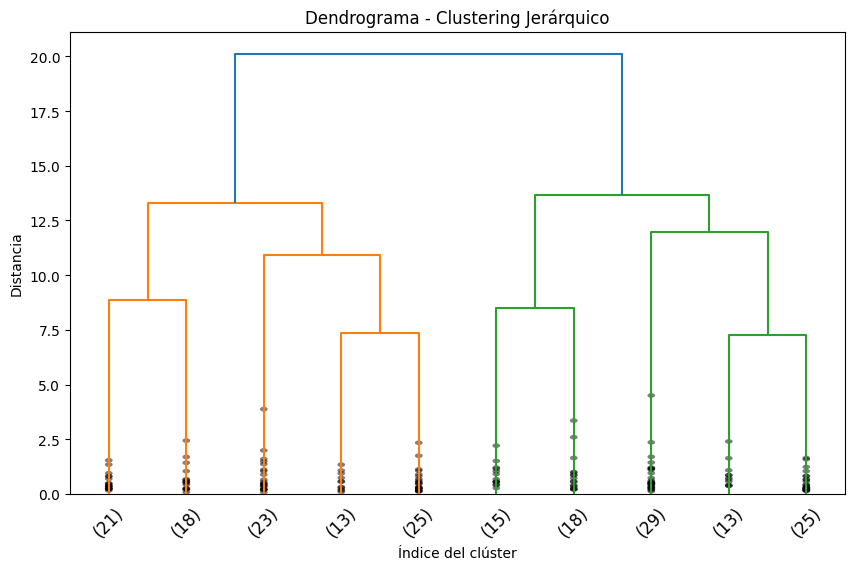

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Índice del clúster')
plt.ylabel('Distancia')
plt.show()


<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


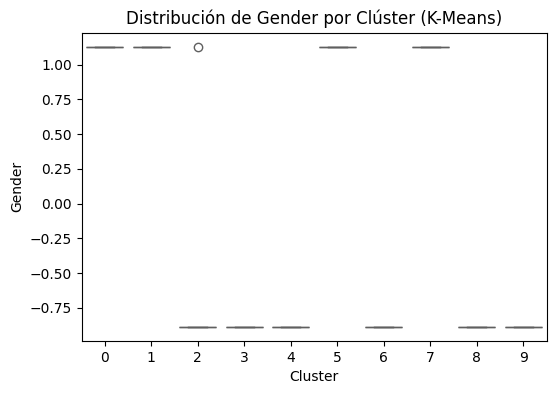

<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


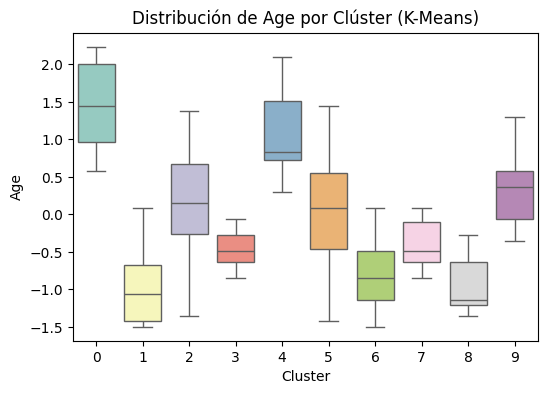

<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


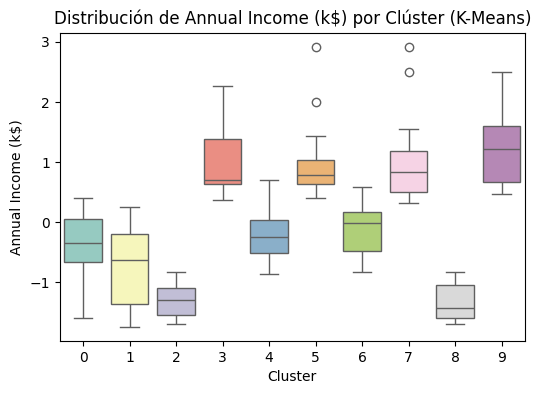

<ipython-input-28-f7be1b7fc855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')


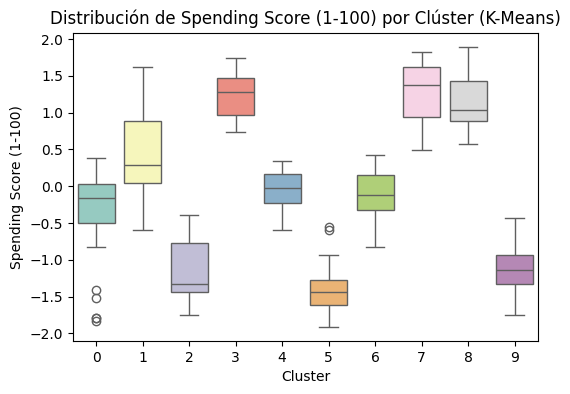

In [28]:
import matplotlib.pyplot as plt
clustered_data = X.copy()
clustered_data['Cluster'] = kmeans_labels

for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=clustered_data, palette='Set3')
    plt.title(f'Distribución de {col} por Clúster (K-Means)')
    plt.show()

## 7. Analisis de Resultados:



Tras aplicar técnicas de aprendizaje no supervisado al conjunto de datos de segmentación de clientes del centro comercial, se entrenaron y evaluaron dos modelos de clustering: K-Means y Clustering Jerárquico. A continuación se presentan los principales hallazgos:

**Número óptimo de clústeres**
El número de clústeres recomendado por el método del Coeficiente de Silhouette fue 10.

En cambio, el método del Codo  sugería un valor óptimo de 4, mostrando que no siempre hay consenso entre diferentes métricas, lo cual es común en clustering no supervisado.

Se optó por seguir el valor de k = 10 para obtener grupos más específicos y bien definidos.

- ## **KMEANS**
Silhouette Score:	0.4208

  Calinski-Harabasz Index:	89.98

  Davies-Bouldin Index:	0.8331

  🔹 Silhouette Score: indica una estructura de clústeres moderadamente buena. Los clústeres no están perfectamente separados, pero tampoco se solapan demasiado.

  🔹 Índice de Calinski-Harabasz: sugiere una separación aceptable entre los clústeres y una buena compacidad interna.

  🔹 Davies-Bouldin Index: mientras más bajo, mejor; este valor muestra una buena separación entre clústeres.

- ## **HIERARCHICAL CLUSTERING**
Silhouette Score:	0.4176
  
  Calinski-Harabasz Index	87.61

  🔹Las métricas son similares a las obtenidas por K-Means, lo que indica que ambos modelos encuentran estructuras similares en los datos.

  🔹K-Means ofrece una ligera ventaja en las métricas de evaluación, especialmente en el Índice de Calinski-Harabasz


El modelo K-Means con 10 clústeres parece ser el más adecuado para este conjunto de datos, ya que ofrece la mejor combinación de compacidad y separación de clústeres.

Aunque los valores de las métricas no son extremadamente altos, indican una segmentación útil que puede servir como base para estrategias de marketing o personalización de servicios.



**INTERPRETACIÓN DE LOS CLUSTERS**
A continuación se describen los perfiles generales de cada clúster obtenido mediante el modelo K-Means con k = 10. Las características están estandarizadas, por lo que los valores positivos indican que están por encima del promedio general, y los negativos por debajo.

- **Clúster 0** : Clientes de edad media, con ingresos moderados y bajo nivel de gasto. Posiblemente conservadores o poco interesados en el consumo
  - Género: Predominantemente masculino

  - Edad: Ligeramente mayor al promedio

  - Ingresos: Ligeramente por debajo del promedio

  - Spending Score: Bajo.

- **Clúster 1**: Jóvenes con ingresos bajos pero con alto nivel de gasto. Podrían representar un perfil impulsivo o de alto consumo relativo.

   -  Género: Predominantemente masculino

   -  Edad: Jóvenes

    - Ingresos: Bajos

    - Spending Score: Alto

- **Clúster 2**:Clientes poco rentableS tienen ingresos bajos y también bajo nivel de gasto. Poca relevancia comercial.
   -  Género: Predominantemente femenino

   - Edad: Edad promedio

   -  Ingresos: Muy bajos

    - Spending Score: Muy bajo


- **Clúster 3**: Clientes ideales: jóvenes, con ingresos altos y gran disposición al consumo. Altamente atractivos para campañas de marketing.
   - Género: Predominantemente femenino

   - Edad: Jóvenes

  - Ingresos: Altos

  -  Spending Score: Muy alto

- **Clúster 4**: Clientes mayores con comportamiento de gasto equilibrado. Pueden requerir una estrategia específica según su fidelidad.
    - Género: Predominantemente femenino

    - Edad: Mayores

    - Ingresos: Ligeramente bajos

    - Spending Score: Promedio

- **Clúster 5**:Clientes con poder adquisitivo, pero que no gastan. Oportunidad para activar campañas de incentivo o fidelización.
    - Género: Predominantemente masculino

    - Edad: Edad promedio

    - Ingresos: Altos

    - Spending Score: Muy bajo

- **Clúster 6**:Clientes jóvenes que gastan poco. Pueden representar estudiantes o personas en primeras etapas laborales
    - Género: Predominantemente femenino

    - Edad: Jóvenes

    - Ingresos: Promedio-bajos

    - Spending Score: Bajo


- **Clúster 7**: Otro clúster de clientes altamente atractivos para marketing. Perfil similar al Clúster 3 pero masculino.
    - Género: Predominantemente masculino

    - Edad: Jóvenes

    - Ingresos: Altos

    - Spending Score: Muy alto


- **Clúster 8**:Clientes jóvenes de bajos ingresos pero que consumen mucho. Puede reflejar un comportamiento impulsivo o tendencias de moda.
    - Género: Predominantemente femenino

    - Edad: Muy jóvenes

    - Ingresos: Muy bajos

    - Spending Score: Alto


- **Clúster 9**: Clientes con alto poder adquisitivo pero muy bajo nivel de consumo. Podrían estar desatendidos o no motivados por las ofertas actuales.
    - Género: Predominantemente femenino

    - Edad: Promedio

    - Ingresos: Muy altos

    - Spending Score: Muy bajo



El modelo ha segmentado de forma coherente la base de clientes, identificando:

  - Clústeres altamente valiosos (3, 7): alto ingreso + alto gasto.

- Oportunidades de mejora (5, 9): alto ingreso + bajo gasto.

- Clústeres con riesgo comercial (2, 6): bajo ingreso + bajo gasto.

Esta segmentación permite diseñar campañas personalizadas por perfil, optimizando estrategias de marketing, promociones y fidelización.

**DENDOGRAMA** El dendrograma obtenido mediante clustering jerárquico muestra una estructura claramente jerárquica en los datos. Al observar el gráfico, se identifica un salto considerable en la distancia de fusión a un nivel cercano a 20, lo que indica que los grupos formados antes de ese punto están significativamente separados.
Al aplicar el criterio del corte horizontal, se sugiere que una segmentación en 4 clústeres es apropiada, ya que se logra un equilibrio entre granularidad y separación entre los grupos. Esta decisión se apoya además en las métricas de evaluación como el Silhouette Score (0.4176) y el Calinski-Harabasz Index (87.61), que indican una estructura de clústeres razonablemente definida.